# Importing Labiraries 📚

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

# Importing Data 📥

In [2]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

# Data Exploration 🔍

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Foundings** 📝

we have two columns with null values

we can fill nans in age with the mean since it's a numeric value<br>but for Cabin, it's a categorical variable so we can fill the missing with the most frequent value

In [4]:
### replacing the shortcuts to be more informative

train_df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace = True)
test_df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace = True)

<AxesSubplot:>

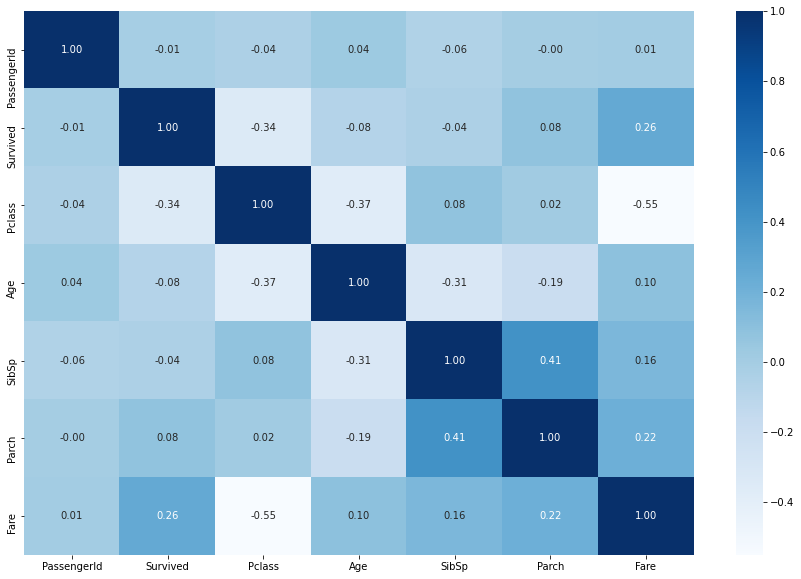

In [5]:
### Lets have a look at the correlation between numeric features


num_var = [col for col in train_df.columns if train_df[col].dtype != 'object']

plt.figure(figsize = (15,10))
sns.heatmap(train_df[num_var].corr(),cmap='Blues', annot = True,fmt = '.2f')

**Findings:** 📝


* Survived has high correlation with PClass and Fare compared to others
* Fare and PClass have a high correlation with each other, we can use it to derive a new column <span style = "color:green">{weightedFare}</span>
* Parch and SibSp have a high correlation with each other, we can use it to derive a new column <span style = "color:green">{FamilySize}</span>


*new Features*
1.  <span style = "color:green">weightedFare</span>:
    PClass is the ticket class, 1 for first class which ofcourse costs higher than other classes, then 2 for second and 3 for third
    we can weight the fare by the follwing formula:  <span style = "color: blue">  wFare = $Fare^{4-Pclass}$ </span>
    since 1 should be weighted more
    than 2 and 3, we subtract Pclass from 4

2.  <span style = "color:green">FamilySize</span>:
    Parch is # of parents / children and SibSp is # of siblings / spouses
    we can add new column that is the sum of the two column to indicate the family size aboard Titatnic for that passenger
    and then categorize it to <span style = "color: red">Single: 1 , 1 < Small <= 3 , 3 < Middle <= 5 , 5 < Large</span>


## Univariant Exploration 📊

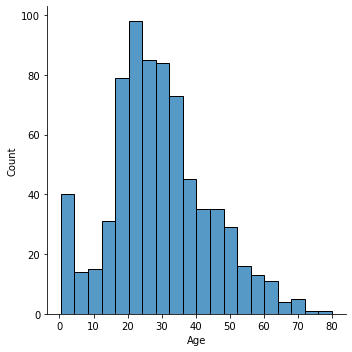

In [6]:
###  Age

sns.displot(data = train_df, x = 'Age')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

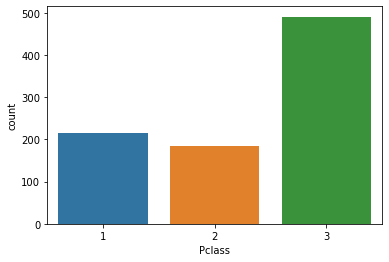

In [7]:
###  Pclass

sns.countplot(data = train_df, x = 'Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

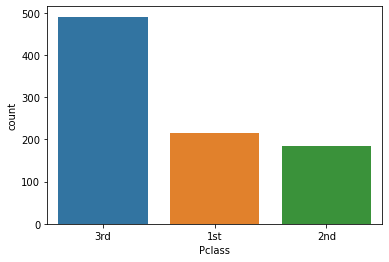

In [8]:
### We found Pclass is a categorical variable, 1 means first class, 2 means second class , 3  means 3rd class
### so it would be better if we mapped these values with their meanings to make it easier to handle later

train_df['Pclass'].replace({1:'1st', 2:'2nd', 3:'3rd'}, inplace  = True)
test_df['Pclass'].replace({1:'1st', 2:'2nd', 3:'3rd'}, inplace  = True)

sns.countplot(data = train_df, x = 'Pclass')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

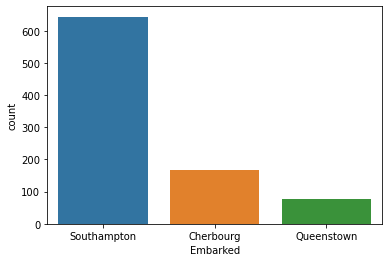

In [9]:
###   Embarked

sns.countplot(data = train_df, x = 'Embarked')

In [10]:
###   Cabin
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**Findings**: 🔍

looking at the unique values of Cabin column, we can derive a new column with values = first char in the cabin code
<br> it makes sense if we think of cabin number starting with a letter that this letter indicate in what floor in the ship the cabin exists<br> then people in higher floors are more likely to survive!

I will handle this in Feature Engineering Part

<AxesSubplot:xlabel='SibSp', ylabel='count'>

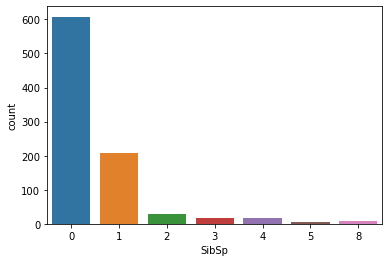

In [11]:
###   SibSp

sns.countplot(data = train_df, x = 'SibSp')

<AxesSubplot:xlabel='Parch', ylabel='count'>

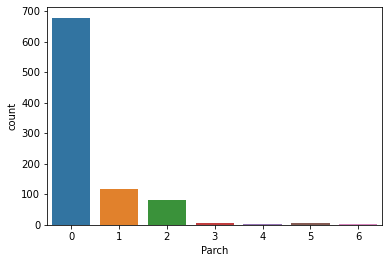

In [12]:
###   Parch

sns.countplot(data = train_df, x = 'Parch')

<AxesSubplot:xlabel='Sex', ylabel='count'>

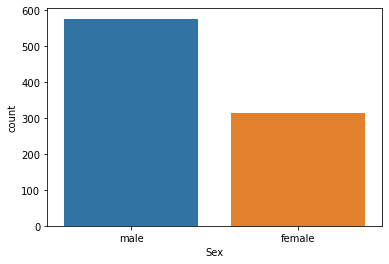

In [13]:
###   Sex

sns.countplot(data = train_df, x = 'Sex')

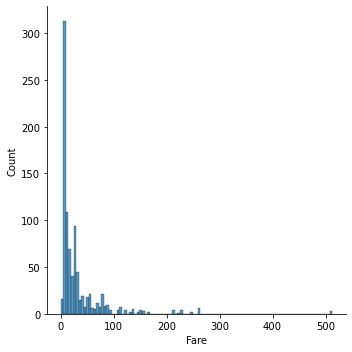

In [14]:
###   Fare

sns.displot(data = train_df, x = 'Fare')

In [15]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
###   it's bretty clear that Fare has outliers that would affect our model performance later
###   so need to drop these outliers
###   I will use IQR to detect outliers in Fare column

Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

train_df = train_df.drop(train_df[((train_df['Fare'] < (Q1 - 1.5 * IQR)) | (train_df['Fare'] > (Q3 + 1.5 * IQR)))].index)

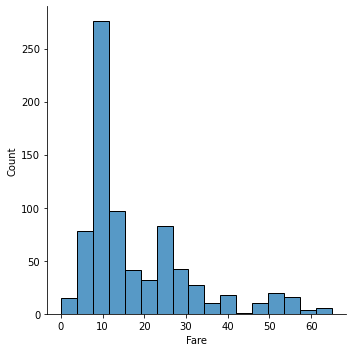

In [17]:
sns.displot(data = train_df, x = 'Fare')

## Bivariant Exploration 📈

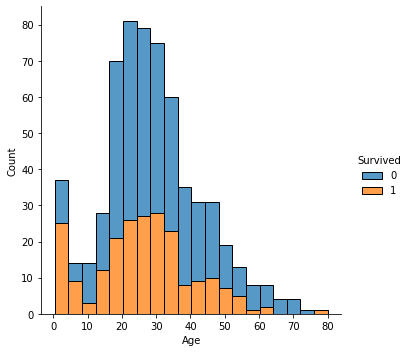

In [18]:
sns.displot(data = train_df, x = 'Age', hue  = 'Survived',multiple="stack" )

In [19]:
olders = train_df[train_df['Age']>40]
younger = train_df[train_df['Age']<=40]

print("Percentage of survived people who are above 40 yeas old is: {:.2f}%".format(olders['Survived'].mean()*100))
print("Percentage of survived people who are less than 40 year old is: {:.2f}%".format(younger['Survived'].mean()*100))

Percentage of survived people who are above 40 yeas old is: 29.17%
Percentage of survived people who are less than 40 year old is: 36.92%


**Foundings** 📝

age affects the survival percentage, younger people are more likely to survive
this can be seen from the garph and the calculated percentages
although number of older people is smaller than number of young people
that's why I separated them and didn't find the percentage by the total number of passengers.

so we can see among the older people, what is the ratio of survived ones
and among of young people, what is the ratio of survived ones

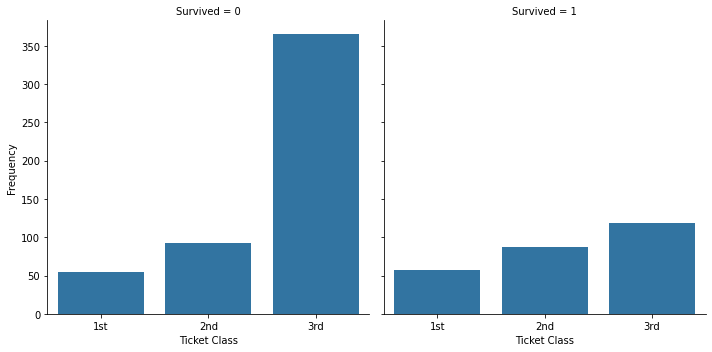

In [20]:
###   Pclass vs Survived

g = sns.FacetGrid(data = train_df, col = 'Survived', height = 5)
g.map(sns.countplot,  'Pclass', order = ['1st', '2nd', '3rd'])
g.set_axis_labels( "Ticket Class","Frequency")
g.tight_layout()

**Foundings** 📝

age affects the survival percentage, younger people are more likely to survive
this can be seen from the garph and the calculated percentages
although number of older people is smaller than number of young people
that's why I separated them and didn't find the percentage referring to the total number of passengers.

so we can see among the older people, what is the ratio of survived ones

and among of young people, what is the ratio of survived ones

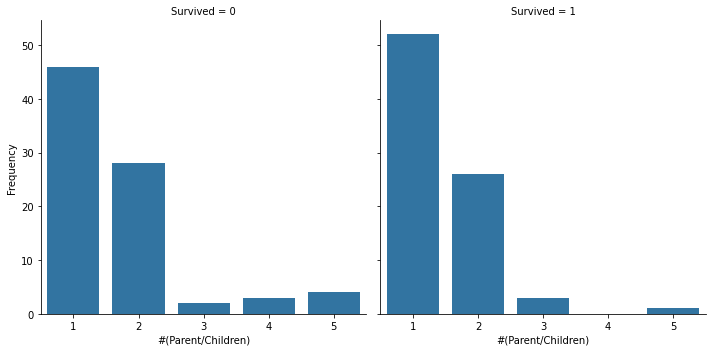

In [21]:
g = sns.FacetGrid(data = train_df, col = 'Survived', height = 5)
g.map(sns.countplot,  'Parch', order = [1,2,3,4,5])
g.set_axis_labels( "#(Parent/Children)","Frequency")
g.tight_layout()

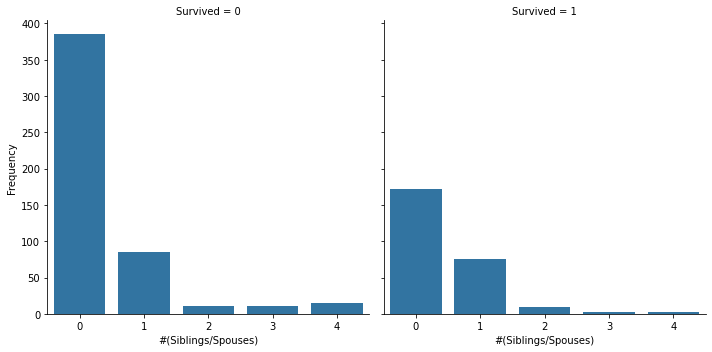

In [22]:


g = sns.FacetGrid(data = train_df, col = 'Survived', height = 5)
g.map(sns.countplot,  'SibSp', order=[0,1,2,3,4])
g.set_axis_labels( "#(Siblings/Spouses)","Frequency")
g.tight_layout()

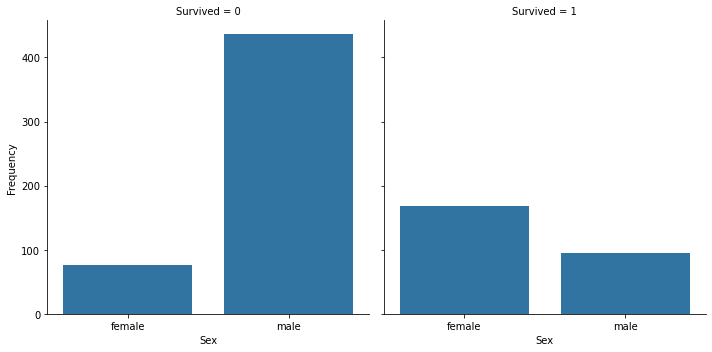

In [23]:
###   Sex vs Survived

g = sns.FacetGrid(data = train_df, col = 'Survived', height = 5)
g.map(sns.countplot, 'Sex', order = ['female', 'male'])
g.set_axis_labels( "Sex","Frequency")
g.tight_layout()

In [24]:
print("Percentage of Survival between females is: {:.2f}%".format(train_df.loc[train_df['Sex']=='female','Survived'].mean()*100))
print("Percentage of Survival between males is: {:.2f}%".format(train_df.loc[train_df['Sex']=='male', 'Survived'].mean()*100))

Percentage of Survival between females is: 68.85%
Percentage of Survival between males is: 17.89%


**findings** 📝

Sex absouletly affects Survival percentage
we can see from graphs that females are more likely to survive than males
and we can also see this from the percentages
we saw earlier that number of males is larger than number of femals, so I didn't calculate the percentage referring to total numbers
instead I split the data by Sex and calculated the percentage for each group


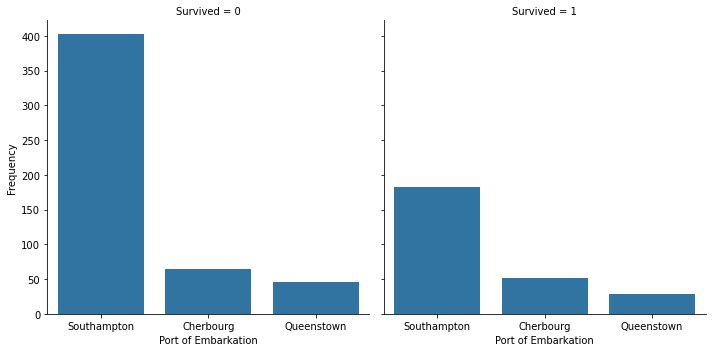

In [25]:
###   Embarked vs Survived

g = sns.FacetGrid(data = train_df, col = 'Survived', height = 5)
g.map(sns.countplot, 'Embarked', order = ['Southampton', 'Cherbourg', 'Queenstown'])
g.set_axis_labels( "Port of Embarkation","Frequency")
g.tight_layout()

In [26]:
print("Percentage of Survival between Southampton Passengers is: {:.2f}%".format(train_df.loc[train_df['Embarked']=='Southampton','Survived'].mean()*100))
print("Percentage of Survival between Cherbourg Passengers is: {:.2f}%".format(train_df.loc[train_df['Embarked']=='Cherbourg','Survived'].mean()*100))
print("Percentage of Survival between Queenstown Passengers is: {:.2f}%".format(train_df.loc[train_df['Embarked']=='Queenstown','Survived'].mean()*100))


Percentage of Survival between Southampton Passengers is: 31.16%
Percentage of Survival between Cherbourg Passengers is: 44.83%
Percentage of Survival between Queenstown Passengers is: 38.67%


**findings** 📝

we can see that people whose Port of Embarkation is Cherbourg are more likely to survive then Queenstown Passengers then Southampthon Passengers

This could make sense if we think that each category of these three should be in a certain part of the ship
then people in the parts that were close to the crash are more likely to die!


# Data Preprocessing

### Useful Functions

In [27]:
def create_Fsize_feature(data):
    """
    This function creates a new feature represent the family size
        then encodes it to 4 columns (categories: 1, 2, 3:4, >5)
        
    """
    # Create new feature (family size)
    data["Fsize"] = data["SibSp"] + data["Parch"] + 1
    
    # encode the family size feature
    data['Single'] = data['Fsize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallF'] = data['Fsize'].map(lambda s: 1 if  s == 2  else 0)
    data['MedF'] = data['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    data['LargeF'] = data['Fsize'].map(lambda s: 1 if s >= 5 else 0)
    
    return data

In [28]:
def weighted_Fare(data):
    data['weightedFare'] = 1
    data.loc[data['Pclass']=='1st','weightedFare'] = data.loc[data['Pclass']=='1st', 'Fare']**3
    data.loc[data['Pclass']=='2nd','weightedFare'] = data.loc[data['Pclass']=='2nd', 'Fare']**2
    data.loc[data['Pclass']=='3rd','weightedFare'] = data.loc[data['Pclass']=='3rd', 'Fare']
    
    return data

### Data Cleaning 🚿

In [29]:
train_mean = train_df.loc[:,'Age'].mean()
print("Mean of Age is:", train_mean)
test_mean = test_df.loc[:,'Age'].mean()

train_df['Age'] = train_df['Age'].fillna(train_mean) # Fill the nan values with the mean of Age values
test_df['Age'] = test_df['Age'].fillna(test_mean) # Fill the nan values with the mean of Age values

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

Mean of Age is: 28.946574225122347


In [30]:
train_df['Embarked'] = train_df['Embarked'].fillna('Southampton')
test_df['Embarked'] = test_df['Embarked'].fillna('Southampton')

### Feature Engineering ⚙️

In [31]:
###  Family Size

train_df = create_Fsize_feature(train_df)
test_df = create_Fsize_feature(test_df)

In [32]:
### Weighted Fare

train_df = weighted_Fare(train_df)
test_df = weighted_Fare(test_df)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

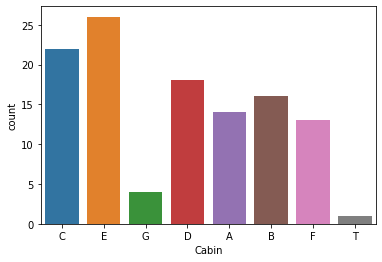

In [33]:
###  Cabin Encoding

train_df['Cabin'] = train_df['Cabin'].str.get(0)
test_df['Cabin'] = test_df['Cabin'].str.get(0)

sns.countplot(data = train_df, x = 'Cabin')

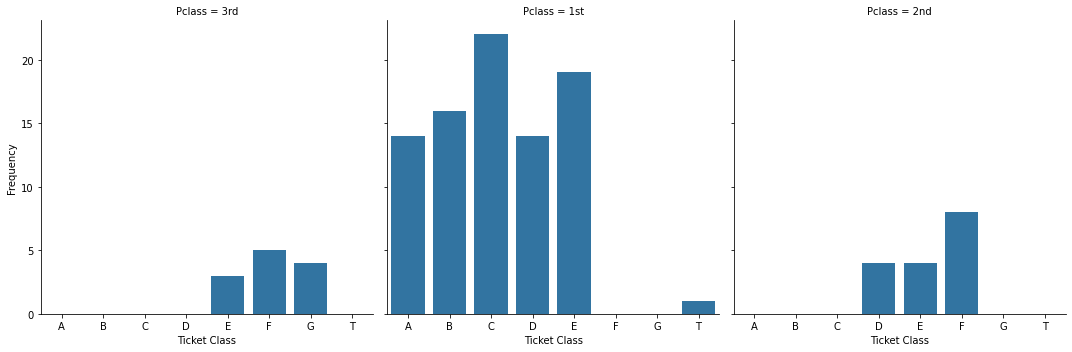

In [34]:
###  Cabin vs Pclass

g = sns.FacetGrid(data = train_df, col = 'Pclass', height = 5)
g.map(sns.countplot,  'Cabin', order = ['A','B','C','D','E','F','G', 'T'])
g.set_axis_labels( "Ticket Class","Frequency")
g.tight_layout()

**Findings**: 📝

it seems our findings were some how right, people with second class ticket are more likely to be in Cabin F
and people with first class ticket are in Cabins A,B,C,D,E
while people with 3rd class are more likely to be in G,E,F

so we can fill missing values in Cabin with the same logic

for 1st class lets fill na in Cabin with 'C'
<br> for 2nd class lets fill na in Cabin with 'F'
<br> for 3rd class lets fill na in Cabin with 'G'

In [35]:
def Cabin_missing(data):
    data.loc[data['Pclass']=='1st','Cabin'] = data.loc[data['Pclass']=='1st','Cabin'].fillna('C')
    data.loc[data['Pclass']=='2nd','Cabin'] = data.loc[data['Pclass']=='2nd','Cabin'].fillna('F')    
    data.loc[data['Pclass']=='3rd','Cabin'] = data.loc[data['Pclass']=='3rd','Cabin'].fillna('G')
    return data

In [36]:
train_df = Cabin_missing(train_df)
test_df = Cabin_missing(test_df)

In [37]:
print("Number of nan values in the whole train_df:\n", train_df.isnull().sum())
print("Number of nan values in the whole test_df:\n", test_df.isnull().sum())

Number of nan values in the whole train_df:
 PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Fsize           0
Single          0
SmallF          0
MedF            0
LargeF          0
weightedFare    0
dtype: int64
Number of nan values in the whole test_df:
 PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Fsize           0
Single          0
SmallF          0
MedF            0
LargeF          0
weightedFare    0
dtype: int64


In [38]:
y = train_df['Survived']
to_drop = ['Survived', 'Ticket', 'Name', 'PassengerId']
train_df.drop(to_drop, axis = 1, inplace = True)

In [39]:
train_df = pd.get_dummies(train_df, drop_first = True)

## Building the Model ⚖️

In [40]:
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(train_df,y, test_size = 0.2, shuffle = True, random_state = 0)

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [84]:
lr = LogisticRegression(random_state = 0, max_iter = 200)  # Test acc: 0.76076 with scaling
                                           # Test acc: 0.75358 without scaling which is weird for me XD
    
#lr = MLPClassifier(hidden_layer_sizes = [100,10,10], random_state = 0, max_iter = 1000)  # Test acc: 0.7655 with scaling

#lr= GradientBoostingClassifier(random_state = 0, max_depth = 4,criterion = 'friedman_mse', learning_rate = 0.01)
#lr = GaussianNB()
lr.fit(X_train, y_train)

print("Train Accuracy is: ", lr.score(X_train, y_train))
print("Test Accuracy is: ", lr.score(X_test, y_test))

Train Accuracy is:  0.8258064516129032
Test Accuracy is:  0.8064516129032258


## Prediction 🎯

In [42]:
Ids = test_df['PassengerId']
features_toDrop = ['Ticket', 'Name', 'PassengerId']
test_df.drop(features_toDrop, axis = 1, inplace = True)
test_df = pd.get_dummies(test_df, drop_first = True)

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   418 non-null    float64
 1   SibSp                 418 non-null    int64  
 2   Parch                 418 non-null    int64  
 3   Fare                  418 non-null    float64
 4   Fsize                 418 non-null    int64  
 5   Single                418 non-null    int64  
 6   SmallF                418 non-null    int64  
 7   MedF                  418 non-null    int64  
 8   LargeF                418 non-null    int64  
 9   weightedFare          418 non-null    float64
 10  Pclass_2nd            418 non-null    uint8  
 11  Pclass_3rd            418 non-null    uint8  
 12  Sex_male              418 non-null    uint8  
 13  Cabin_B               418 non-null    uint8  
 14  Cabin_C               418 non-null    uint8  
 15  Cabin_D               4

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   775 non-null    float64
 1   SibSp                 775 non-null    int64  
 2   Parch                 775 non-null    int64  
 3   Fare                  775 non-null    float64
 4   Fsize                 775 non-null    int64  
 5   Single                775 non-null    int64  
 6   SmallF                775 non-null    int64  
 7   MedF                  775 non-null    int64  
 8   LargeF                775 non-null    int64  
 9   weightedFare          775 non-null    float64
 10  Pclass_2nd            775 non-null    uint8  
 11  Pclass_3rd            775 non-null    uint8  
 12  Sex_male              775 non-null    uint8  
 13  Cabin_B               775 non-null    uint8  
 14  Cabin_C               775 non-null    uint8  
 15  Cabin_D               7

In [45]:
test_df['Cabin_T'] = 0

In [46]:
test_df = sc.transform(test_df)

In [47]:
def submit():
    Y = lr.predict(test_df)
    pred = {"PassengerId": Ids, "Survived": Y}
    pred = pd.DataFrame(pred)
    pred.to_csv('Subb.csv', index = False, encoding = 'utf-8')

In [48]:
submit()